# Lecture 1

In this notebook, we first illustrate the basic machine learning workflow in Python (using the well-known [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)), and then show an implementation of the decision tree learning algorithm for classification.

To run these examples, you need to have a Python installation that includes [scikit-learn](https://scikit-learn.org/stable/) (for machine learning), [matplotlib](https://matplotlib.org/) (for plotting), and [pandas](https://pandas.pydata.org/) (for loading the dataset). If you use the Anaconda distribution, you'll have these libraries out of the box.

You'll also need to install [graphviz](https://pypi.org/project/graphviz/) to make the tree drawing work. If you use Anaconda, you need to install [graphviz](https://anaconda.org/anaconda/graphviz) and [python-graphviz](https://anaconda.org/conda-forge/python-graphviz).

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')


### Loading the iris data

You can download the dataset as a CSV file [here](http://www.cse.chalmers.se/~richajo/dit866/lectures/l1/iris.csv). We first use [pandas](https://pandas.pydata.org/) to load the CSV file that stores the Iris data. Please note that you need to change the path to where you stored the csv file.

We shuffle the dataset and split it into an input part `X` and an output part `Y`. In this case, we want to predict the type of iris: [*setosa*](https://en.wikipedia.org/wiki/Iris_setosa), [*versicolor*](https://en.wikipedia.org/wiki/Iris_versicolor), or [*virginica*](https://en.wikipedia.org/wiki/Iris_virginica).

In [64]:
import pandas as pd

data = pd.read_csv('iris.csv')
data_shuffled = data.sample(frac=1.0, random_state=0)
X = data_shuffled.drop('species', axis=1)
Y = data_shuffled['species']

Let's take a peek at the data. As you can see, there are four numerical column that we use as input, and then the discrete output column representing the species, which we'll use as the output.

In [65]:
data_shuffled.head()

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


The example above uses a pandas [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) to store the data. If you want to convert into a raw NumPy matrix, it can be done easily by calling `to_numpy`.

In [66]:
X.to_numpy()[:5]

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2]])

### Basic workflow

Let's have some basic machine learning examples.

We start by splitting the data into a training and test part. 40% of the data will be used for testing and the rest for training. We use the utility function `train_test_split` from the scikit-learn library.

The train/test split is done randomly. The parameter `random_state` is used to set the random seed to a constant value, so that our results are reproducible.

In [67]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.4, random_state=0)

We import a scikit-learn class representing [decision tree classifiers](https://en.wikipedia.org/wiki/Decision_tree_learning).

We create a decision tree classifier and train it on the training set (`fit`).

In [68]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(Xtrain, Ytrain);

Let's see what the classifier says about one particular instance. We take a look at the first instance in the test set:

In [69]:
Xtest.head(1)

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3


We comput the classifier's prediction for this instance, and in this case the classifier thinks that this is a [*virginica*](https://en.wikipedia.org/wiki/Iris_virginica).

In [70]:
one_instance = Xtest.head(1)

clf.predict(one_instance)

array(['virginica'], dtype=object)

By looking at the output part of the test set, we can verify that the classifier was correct in this case.

In [71]:
Ytest.head(1)

118    virginica
Name: species, dtype: object

We can compute predictions for all instances in the test set. Note that the `predict` method for scikit-learn predictors normally expects a *set* of instances, not a single instance.

In [72]:
all_predictions = clf.predict(Xtest)

all_predictions

array(['virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'virginica', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor'], dtype=object)

How good are our predictions? We compute the *accuracy* of our classifier for this test set. The accuracy is defined as the proportion of right answers. (See [here](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers) for some other ways to evaluate classifiers.)

The iris dataset is quite easy, and the accuracy is quite high for our classifier.

In [73]:
from sklearn.metrics import accuracy_score

accuracy_score(Ytest, all_predictions)

0.9333333333333333

Alternatively, we can call the method `score` for our classifier. This method will predict on the test set and then evaluate the predictions using the accuracy.

In [74]:
clf.score(Xtest, Ytest)

0.9333333333333333

Normally, we'll carry out several evaluations while we are selecting the best model. This will be done using a separate *validation set*, like a second test set, or using [*cross-validation*](https://en.wikipedia.org/wiki/Cross-validation_(statistics)).

In scikit-learn, there are a couple of ways that we can do cross-validation. The simplest way is to call `cross_val_score`, which for each cross-validation fold will call the method `score` mentioned above.

In [75]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, Xtest, Ytest, cv=5).mean()

0.8882517482517484

Alternatively, you can call `cross_validate`, where you can specify what kind of metric to use. The output of this function is also a bit more detailed.

In [76]:
from sklearn.model_selection import cross_validate

cross_validate(clf, Xtest, Ytest, cv=5, scoring='accuracy')

{'fit_time': array([0.00344992, 0.00319099, 0.00324512, 0.00239921, 0.00212407]),
 'score_time': array([0.00250196, 0.00125813, 0.0014112 , 0.00115705, 0.00116706]),
 'test_score': array([1.        , 0.84615385, 1.        , 0.81818182, 0.9       ])}

Finally, let's evaluate some other classifiers in addition to the decision trees. We first consider linear [support vector classifiers](https://en.wikipedia.org/wiki/Support-vector_machine).

In [77]:
from sklearn.svm import LinearSVC

clf2 = LinearSVC(max_iter=10000)
cross_validate(clf2, Xtest, Ytest, cv=5, scoring='accuracy')

{'fit_time': array([0.01152492, 0.0117209 , 0.01077199, 0.01251101, 0.01201391]),
 'score_time': array([0.00202298, 0.00171494, 0.00140309, 0.00185776, 0.0029459 ]),
 'test_score': array([0.92307692, 1.        , 1.        , 0.72727273, 0.9       ])}

In [78]:
from sklearn.dummy import DummyClassifier

majority_baseline = DummyClassifier(strategy='most_frequent')
cross_validate(majority_baseline, Xtest, Ytest, cv=5, scoring='accuracy')

{'fit_time': array([0.00252008, 0.00253916, 0.00208688, 0.00123191, 0.00174284]),
 'score_time': array([0.00129485, 0.00113201, 0.0004952 , 0.00047994, 0.00049782]),
 'test_score': array([0.38461538, 0.38461538, 0.38461538, 0.36363636, 0.4       ])}

### Illustrating the iris example

We'll provide some illustrations of how the various types of classifiers work by drawing the *decision boundaries* for a two-dimensional dataset.

Since the iris dataset has four dimension, we select two columns (petal length and width) so that we can plot the data in a two-dimensional scatterplot.

<IPython.core.display.Javascript object>


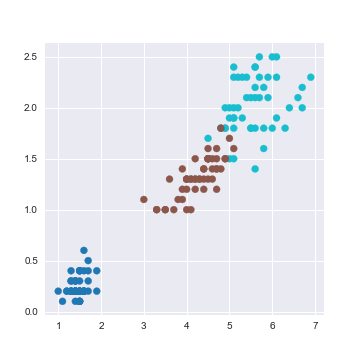

In [79]:
%matplotlib notebook
X2 = X[['petal_length', 'petal_width']]
Y_encoded = Y.replace({'setosa':0, 'versicolor':1, 'virginica':2})

plt.figure(figsize=(5,5))
plt.scatter(X2.petal_length, X2.petal_width, c=Y_encoded, cmap='tab10');

We define a utility function that makes a scatterplot of a dataset and also draws the decision boundary. Here, we're using a bit of NumPy and matplotlib tricks. Don't worry about the details.

In [80]:
def plot_boundary(clf, X, Y, cmap='tab10', names=None):

    if isinstance(X, pd.DataFrame):
        if not names:
            names = list(X.columns)
        X = X.to_numpy()

    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()

    x_off = (x_max-x_min)/25
    y_off = (y_max-y_min)/25
    x_min -= x_off
    x_max += x_off
    y_min -= y_off
    y_max += y_off
    
    xs = np.linspace(x_min, x_max, 250)
    ys = np.linspace(y_min, y_max, 250)
    
    xx, yy = np.meshgrid(xs, ys)
    
    lenc = {c:i for i, c in enumerate(clf.classes_)}
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array([lenc[z] for z in Z])
    Z = Z.reshape(xx.shape)
    Yenc = [lenc[y] for y in Y]
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.15)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)
        
    sc = plt.scatter(X[:,0], X[:,1], c=Yenc, cmap=cmap, alpha=0.5, edgecolors='k', linewidths=0.5);
    
    plt.legend(handles=sc.legend_elements()[0], labels=list(clf.classes_))
    
    if names:
        plt.xlabel(names[0])
        plt.ylabel(names[1])

Now we can plot some decision boundaries. Here, we see the how it looks for a linear classifier:

/Users/marcusragnarsson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<IPython.core.display.Javascript object>


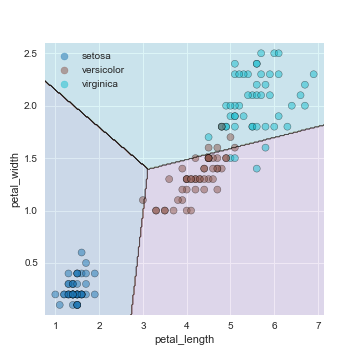

In [81]:
from sklearn.svm import LinearSVC

cls = LinearSVC()
cls.fit(X2, Y)
plot_boundary(cls, X2, Y)

And for a decision tree, the decision boundary has the characteristic shape with right angles.

<IPython.core.display.Javascript object>


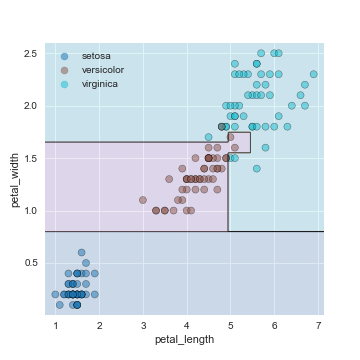

In [82]:
cls = DecisionTreeClassifier()
cls.fit(X2, Y)
plot_boundary(cls, X2, Y)

### Decision tree implementation

In the following section, we'll implement a learning algorithm for decision tree classifiers.

To represent a decision tree, we define the two components of decision trees: leaves and branches. A *leaf* corresponds to the base case of a recursion. It is a "dummy" tree that always returns a constant value.

The code that is used to draw the trees can be ignored if you want.

In [86]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        graph.node(node_id, str(self.value), style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

A *branch* will look at one feature, and will select a subtree depending on the value of the feature. That subtree will then be called recursively to compute the prediction.

This implementation assumes that the feature is numerical. Depending on whether the feature is or isn't greater than a threshold, the "high" or "low" subtree will be selected.

In [87]:
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id
        

Now, we have the components needed to implement decision tree classifiers and regression models.

Following standard practice in scikit-learn, we inherit from the class [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), which is the base class of all classifiers and regression models.

We write the `DecisionTree` class as an abstract class that contains the functionality common to all types of decision trees. Classification and regression models will be implemented as subclasses. The classification subclass is given below, while the regression subclass will be implemented as a part of the first assignment. Following scikit-learn naming conventions, we'll call the training and prediction methods `fit` and `predict`, respectively.

The functions that the subclasses will need to implement, and which are done differently for classification and regression, are the following:

* `get_default_value`: what output value to use if we decide to return a leaf node. For classification, this will be the most common output value, while for regression it will be the mean.
* `is_homogeneous`: tests whether a set of output values is homogeneous. For classification, this means that all outputs are identical; for regression, we'll probably test whether the variance is smaller than some threshold.
* `best_split`: finds the best splitting point for that feature. For classification, this will be based on one of the classification criteria (information gain, gini impurity, majority sum); for regression, it will be based on variances in the subsets.

In [89]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth

    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be 
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

This is the subclass that implements decision tree classification. This implementation makes heavy use of the [`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) class, which is a standard Python data structure for frequency counting.

In [90]:
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        XY = sorted(zip(X[:, feature], Y))

        n = len(XY)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = XY[i][0]
            y_i = XY[i][1]

            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            x_next = XY[i+1][0]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(XY[max_i][0] + XY[max_i+1][0])
        return score, feature, split_point


Here, we define the various criteria we can use to find the "quality" of a split in terms of how homogeneous the subsets are. See the reading material for the mathematical definitions of these criteria.

In [91]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

### Iris example, continued

Now, let's train decision trees for the iris dataset, using our own implementation (and not the one that's included in scikit-learn, which we used previously).

We can investigate how the `max_depth` hyperparameter affects the decision boundary. Generally, if we allow deeper trees, we can express more complex boundaries. This allows us to handle more "difficult" datasets but also introduces the risk of overfitting.

(If you didn't install graphviz, you can just remove the line that includes `draw_tree`.)

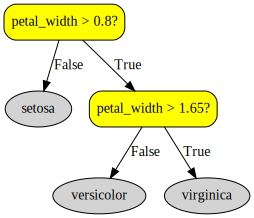

In [92]:
cls = TreeClassifier(max_depth=2)
cls.fit(X2, Y)
cls.draw_tree()

<IPython.core.display.Javascript object>


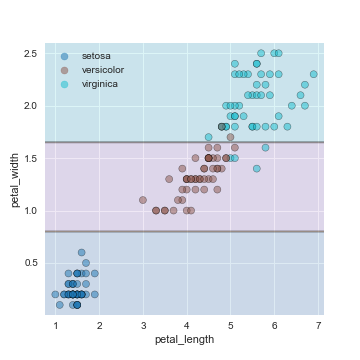

In [93]:
plot_boundary(cls, X2, Y)

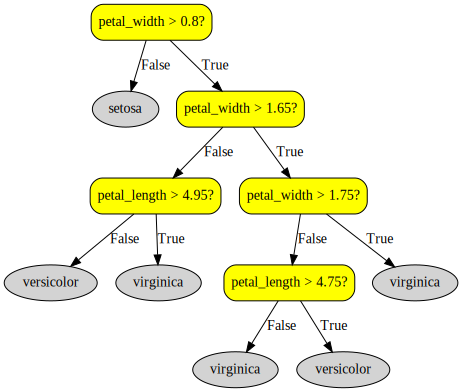

In [94]:
cls = TreeClassifier(max_depth=4)
cls.fit(X2, Y)
cls.draw_tree()

<IPython.core.display.Javascript object>


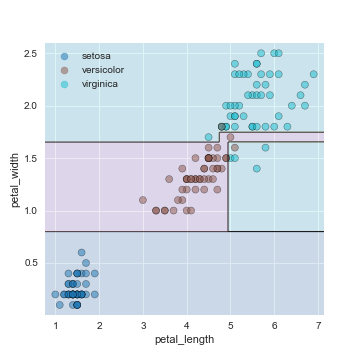

In [96]:
plot_boundary(cls, X2, Y)